In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline  

# load data and select all numerical features

In [2]:
data = pd.read_csv('../data/2018_04_14/listings.csv')

In [4]:
intfeatures = ['id','host_id','host_listings_count',
       'host_total_listings_count','accommodates','guests_included','minimum_nights','maximum_nights',
               'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','calculated_host_listings_count']
floatfeatures = ['latitude','longitude','bathrooms','bedrooms', 'beds','review_scores_rating','reviews_per_month']
datefeatures = ['last_scraped','host_since','first_review', 'last_review']
percentfeatures =['host_response_rate']
pricefeatures = ['price', 'security_deposit', 'cleaning_fee','extra_people']
features = ['id', 'last_scraped', 'host_id', 'host_since', 'host_response_rate', 'host_listings_count',
       'host_total_listings_count', 'latitude',
       'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'calculated_host_listings_count','reviews_per_month', 'price']

In [5]:
df = data[features].dropna().reset_index(drop=True)
df[intfeatures] = df[intfeatures].astype('int')
df[floatfeatures] = df[floatfeatures].astype('float')
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: int(x[0:-1]))
for x in pricefeatures:
    df[x] = df[x].apply(lambda x: x.replace('$','').replace(',','')).astype(float)
df.loc[df['maximum_nights']>2000,'maximum_nights']=2000
for x in datefeatures:
    df[x] = pd.to_datetime(df[x])
    min_ = df[x].min()
    df[x] = (df[x]-min_).dt.days

# Distribuiton of price in 2018

Skewness: 9.898147
Kurtosis: 257.607506


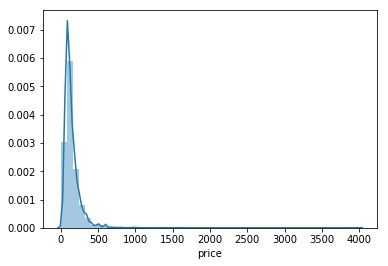

In [75]:
sns.distplot(df['price'])
print("""Skewness: %f
Kurtosis: %f""" % (df['price'].skew(),df['price'].kurt()))

In [76]:
df['price'].describe()

count    4197.000000
mean      142.974029
std       120.993733
min         0.000000
25%        80.000000
50%       115.000000
75%       175.000000
max      3999.000000
Name: price, dtype: float64

# Correlation Between All numerical features

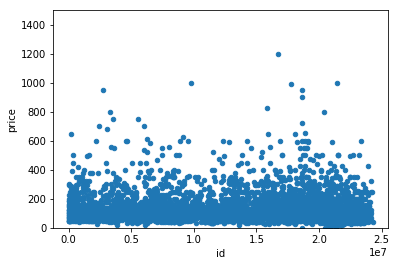

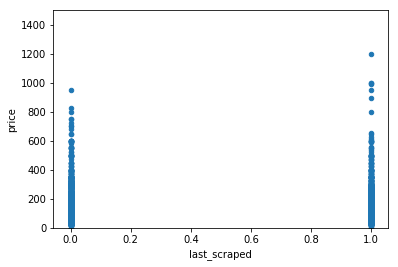

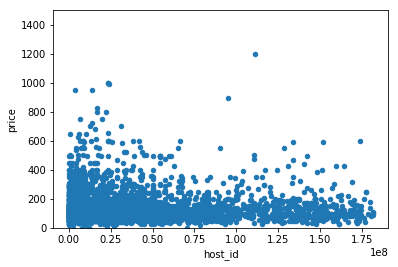

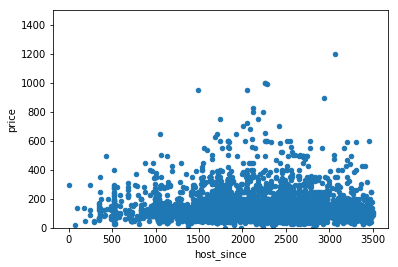

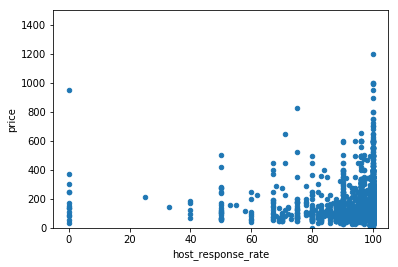

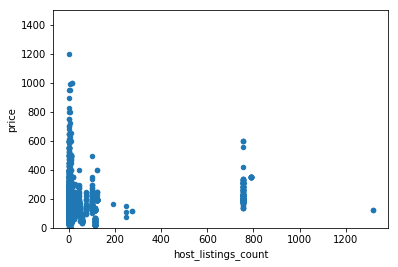

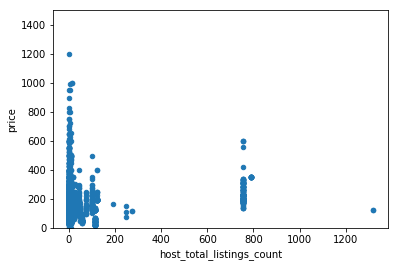

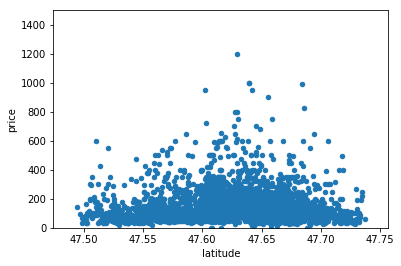

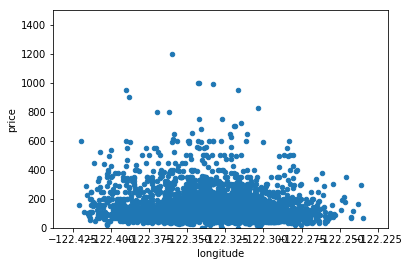

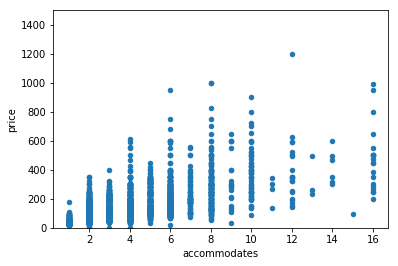

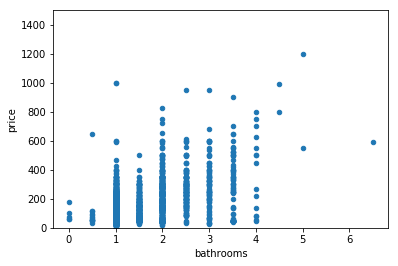

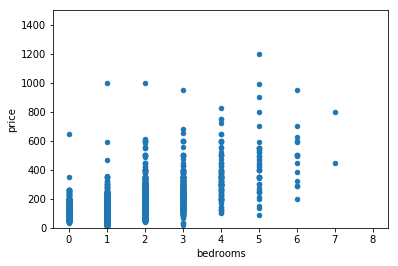

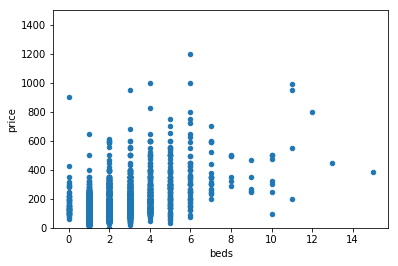

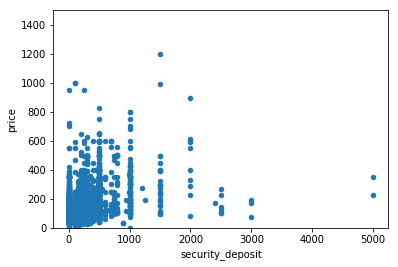

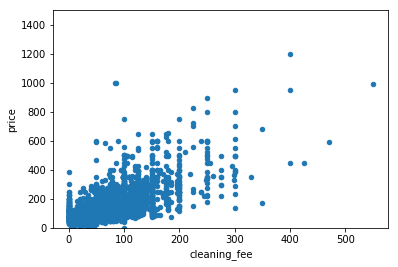

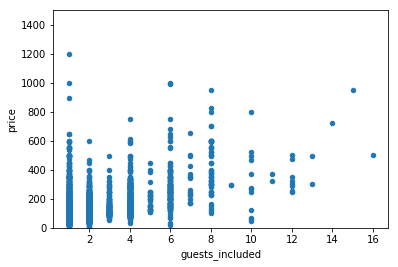

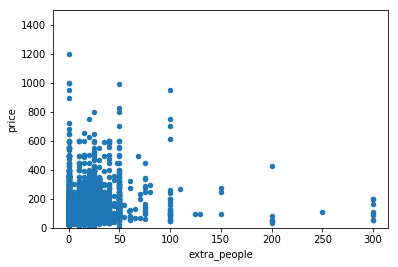

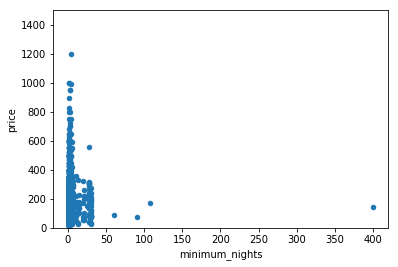

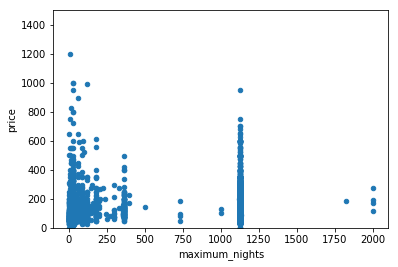

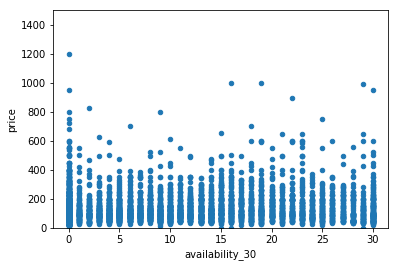

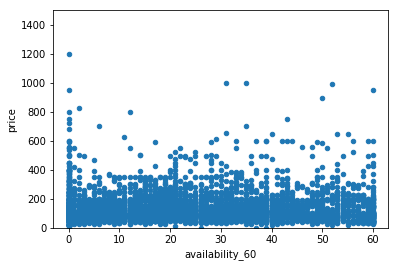

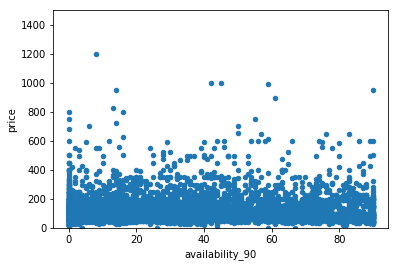

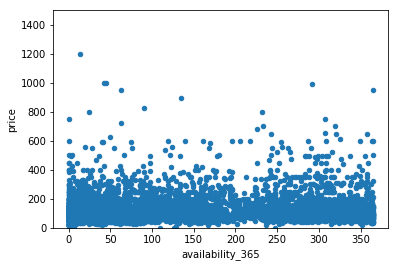

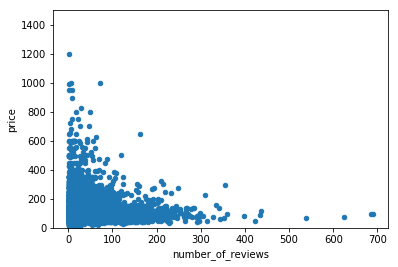

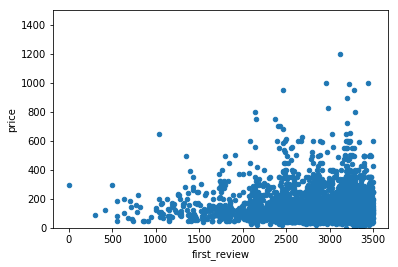

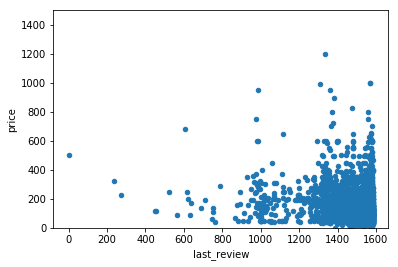

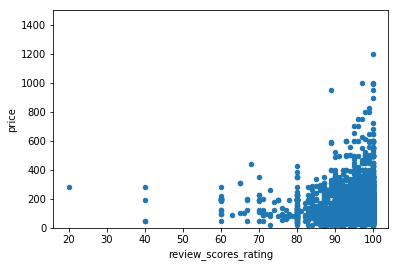

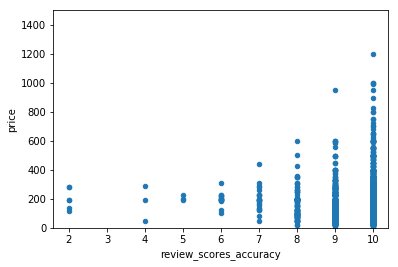

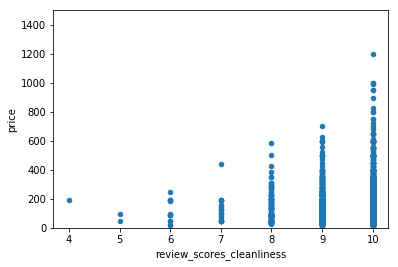

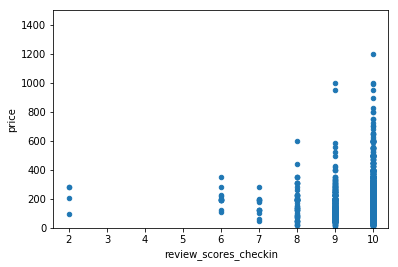

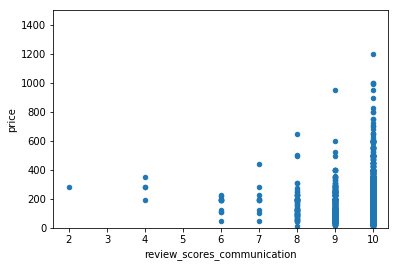

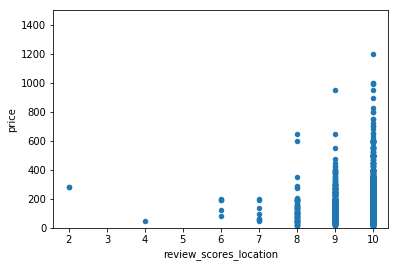

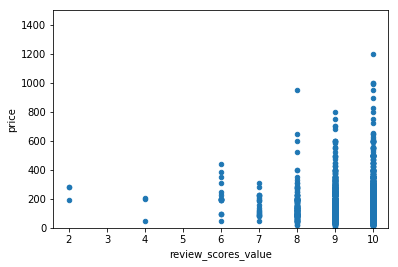

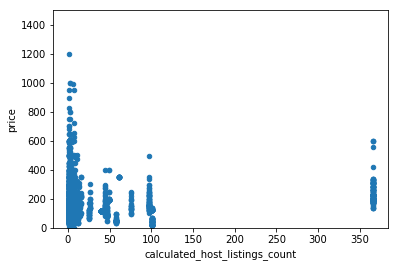

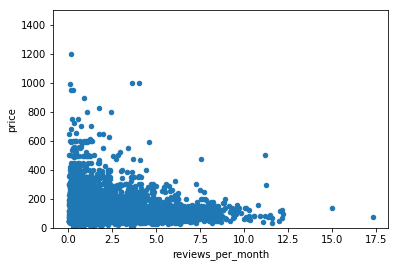

In [10]:
for f in features[0:-1]:
    try:
        df.plot.scatter(x=f,y='price',ylim=(0,1500))
    except:
        print(f,'fail')
        

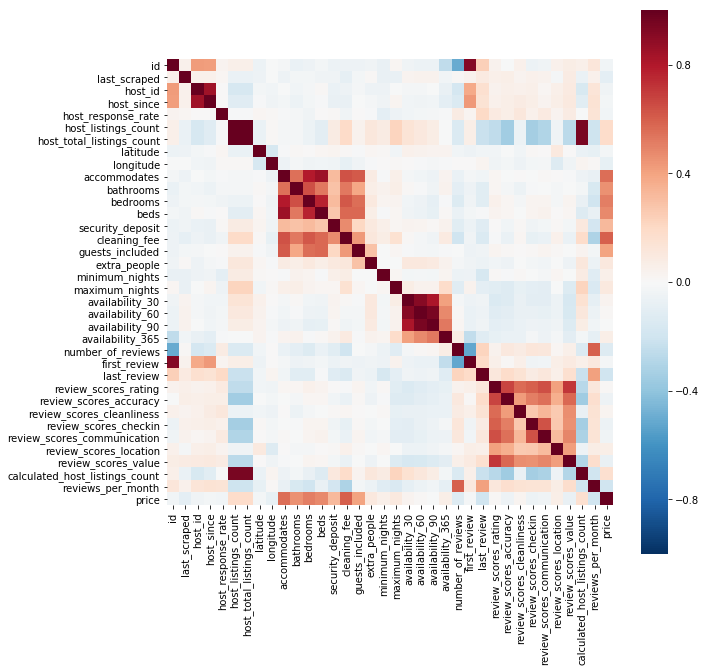

In [13]:
corrdf = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrdf,vmax=1,vmin=-1,square=True,cmap='RdBu_r')

# categorical features and price

In [6]:
catfeatures = ['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified',
                'neighbourhood_cleansed','neighbourhood_group_cleansed','zipcode','property_type','room_type',
               'bed_type','calendar_updated','cancellation_policy','require_guest_profile_picture']
df2 = data[catfeatures]
df2['price'] = data['price'].apply(lambda x: x.replace('$','').replace(',','')).astype(float)
df2 = df2.dropna().reset_index(drop=True)

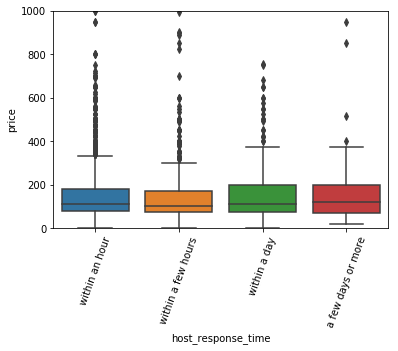

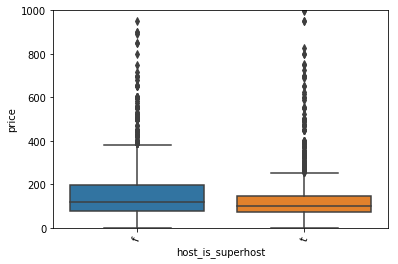

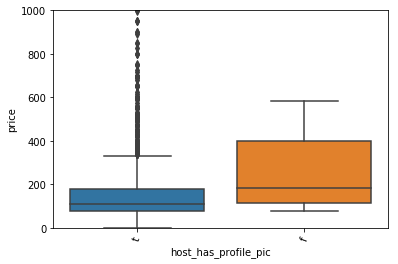

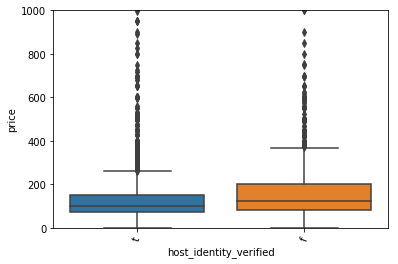

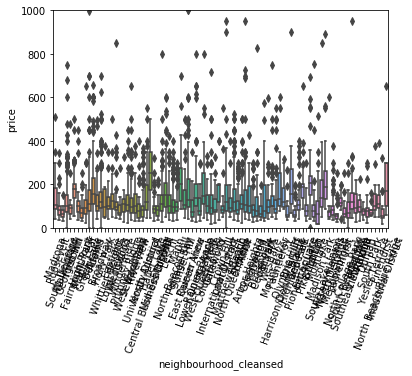

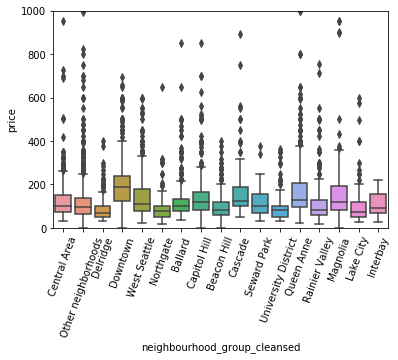

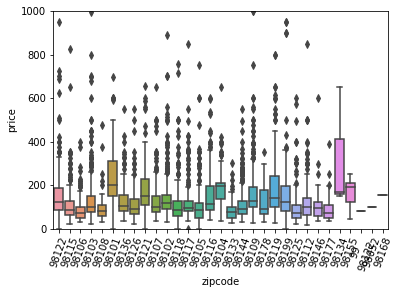

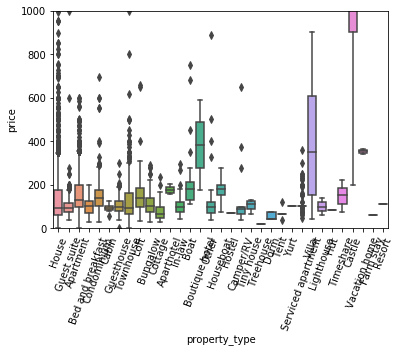

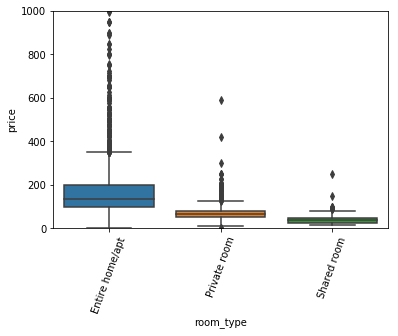

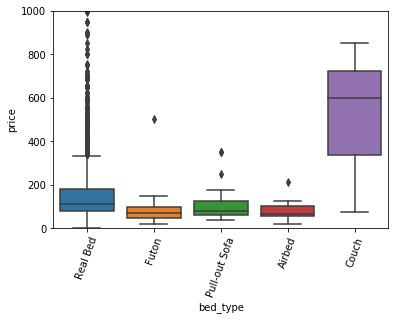

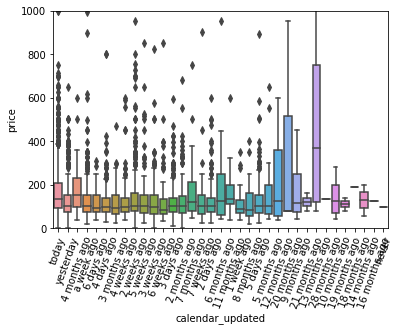

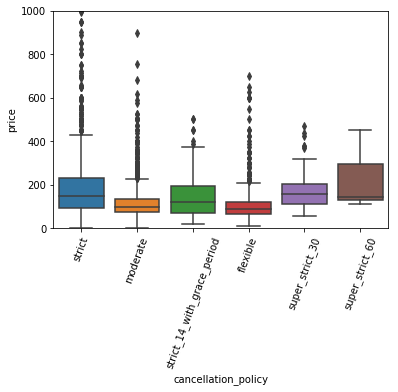

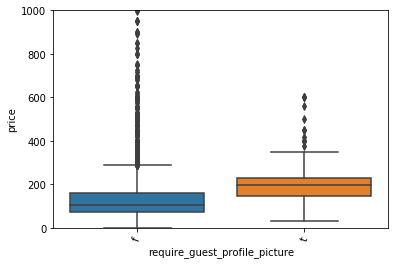

In [12]:
def myboxplot(mydata,feature,ymin=0,ymax=5000):
    f,ax = plt.subplots()
    fig = sns.boxplot(x=feature,y='price',data=mydata,ax=ax)
    #fig = sns.swarmplot(x=feature, y="price", data=mydata, color=".25")
    fig.axis(ymin=0,ymax=1000)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
    plt.show()
for x in catfeatures:
    myboxplot(df2,x)